In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [3]:
def manipulate_and_wrangle_data(df):
    """
    Manipulate and wrangle the DataFrame.

    Parameters:
    - df (pd.DataFrame): Original DataFrame.

    Returns:
    - df_wrangled (pd.DataFrame): Wrangled DataFrame.
    """
    # Example: Create a new feature 'total_income' by combining 'amount' and 'percent_of_income'
    df['total_income'] = df['amount'] * (1 + df['percent_of_income'] / 100)

    # Example: Convert categorical variables to numerical using one-hot encoding
#     df = pd.get_dummies(df, columns=['checking_balance', 'credit_history', 'purpose', 'savings_balance', 'employment_duration', 'other_credit', 'housing', 'job', 'phone'], prefix=['checking', 'credit', 'purpose', 'savings', 'employment', 'credit', 'housing', 'job', 'phone'])

    label_encoder = LabelEncoder()
    
    categorical_columns = df.select_dtypes(include=['object']).columns

    for col in categorical_columns:
        df[col] = label_encoder.fit_transform(df[col])

    # Example: Group by 'default' and calculate the mean for each group
    df_grouped = df.groupby('default').mean().reset_index()

    return df, df_grouped

In [4]:
def visualize_data(df):
    """
    Visualize the DataFrame.

    Parameters:
    - df (pd.DataFrame): DataFrame to visualize.
    """
    # Example: Create a correlation heatmap
    plt.figure(figsize=(10, 8))
    sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
    plt.title('Correlation Heatmap')
    plt.show()

    # Example: Plot a bar chart of 'default' counts
    plt.figure(figsize=(8, 6))
    sns.countplot(x='default', data=df, palette='viridis')
    plt.title('Default Counts')
    plt.xlabel('Default')
    plt.ylabel('Count')
    plt.show()

    # Visualize the distribution of 'total_income' for each 'default' category
    plt.figure(figsize=(10, 6))
    sns.histplot(data=df, x='total_income', hue='default', bins=30, kde=True, palette='Set1')
    plt.title('Distribution of Total Income by Default Category')
    plt.xlabel('Total Income')
    plt.ylabel('Frequency')
    plt.show()

In [5]:

# Load your dataset (replace 'your_dataset.csv' with your actual file path)
file_path = './data/German_bank.csv'
df = pd.read_csv(file_path)

# Manipulate and wrangle the data
df_wrangled, grouped_df = manipulate_and_wrangle_data(df)

In [6]:
df.head()

,checking_balance,months_loan_duration,credit_history,purpose,amount,savings_balance,employment_duration,percent_of_income,years_at_residence,age,other_credit,housing,existing_loans_count,job,dependents,phone,default,total_income
0,1,6,0,4,1169,4,3,4,4,67,1,1,2,1,1,1,0,1215.76
1,0,48,1,4,5951,2,0,2,2,22,1,1,1,1,1,0,1,6070.02
2,3,12,0,3,2096,2,1,2,3,49,1,1,1,3,2,0,0,2137.92
3,1,42,1,4,7882,2,1,2,4,45,1,0,1,1,2,0,0,8039.64
4,1,24,3,1,4870,2,0,3,4,53,1,0,2,1,2,0,1,5016.10


In [7]:
df_wrangled  # total_income column created

,checking_balance,months_loan_duration,credit_history,purpose,amount,savings_balance,employment_duration,percent_of_income,years_at_residence,age,other_credit,housing,existing_loans_count,job,dependents,phone,default,total_income
0,1,6,0,4,1169,4,3,4,4,67,1,1,2,1,1,1,0,1215.76
1,0,48,1,4,5951,2,0,2,2,22,1,1,1,1,1,0,1,6070.02
2,3,12,0,3,2096,2,1,2,3,49,1,1,1,3,2,0,0,2137.92
3,1,42,1,4,7882,2,1,2,4,45,1,0,1,1,2,0,0,8039.64
4,1,24,3,1,4870,2,0,3,4,53,1,0,2,1,2,0,1,5016.10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,12,1,4,1736,2,1,3,4,31,1,1,1,3,1,0,0,1788.08
996,1,30,1,1,3857,2,0,4,4,40,1,1,1,0,1,1,0,4011.28
997,3,12,1,4,804,2,3,4,4,38,1,1,1,1,1,0,0,836.16
998,1,45,1,4,1845,2,0,4,4,23,1,0,1,1,1,1,1,1918.80


In [8]:
grouped_df

,default,checking_balance,months_loan_duration,credit_history,purpose,amount,savings_balance,employment_duration,percent_of_income,years_at_residence,age,other_credit,housing,existing_loans_count,job,dependents,phone,total_income
0,0,1.830000,19.207143,0.935714,2.598571,2985.457143,2.22,1.517143,2.920000,2.842857,36.224286,0.922857,1.064286,1.424286,1.294286,1.155714,0.415714,3065.399014
1,1,1.003333,24.860000,1.383333,2.403333,3938.126667,1.97,1.543333,3.096667,2.850000,33.963333,0.873333,1.086667,1.366667,1.226667,1.153333,0.376667,4047.246833


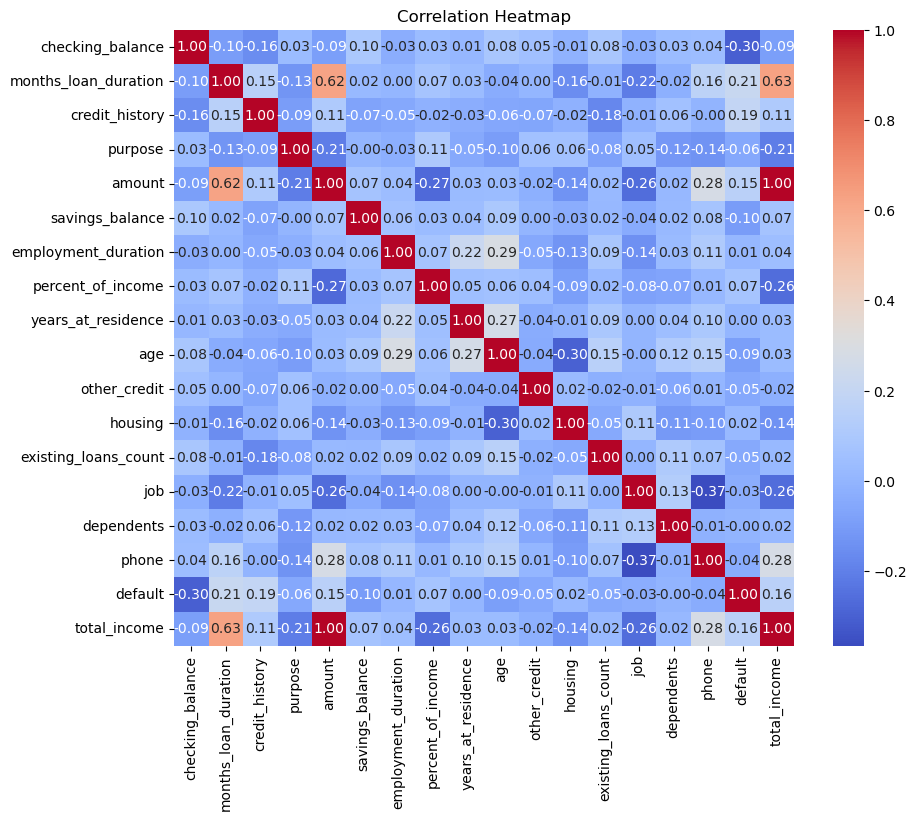

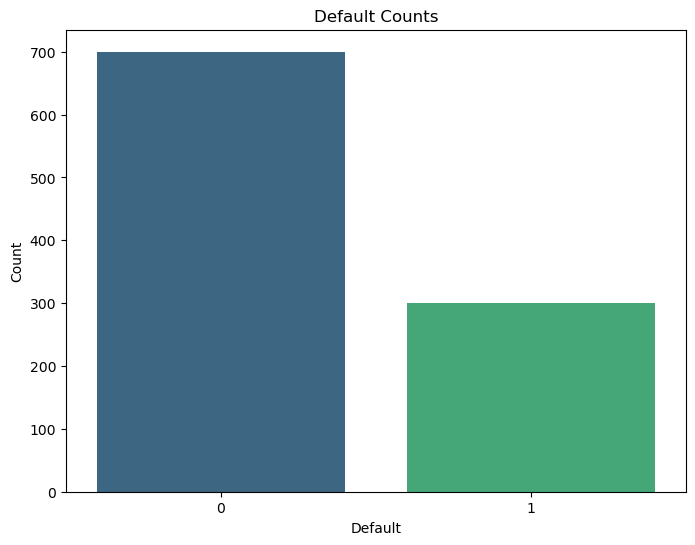

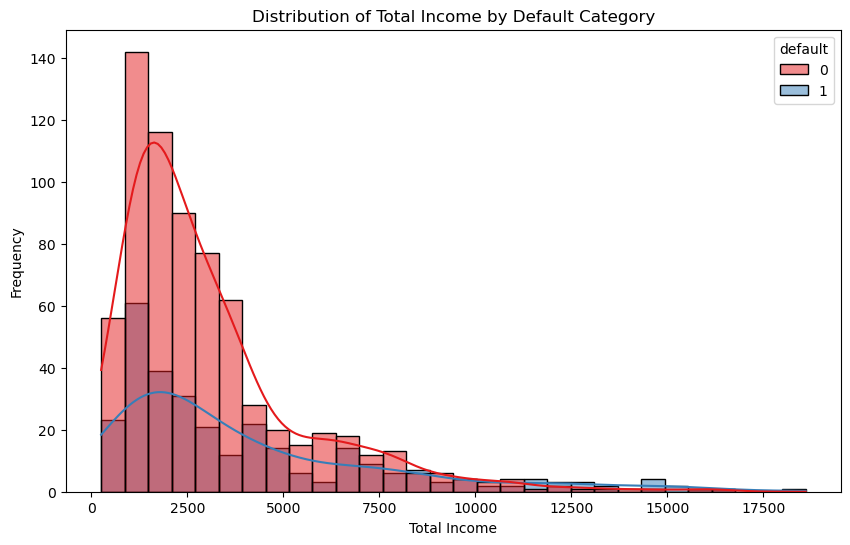

In [9]:
# Visualize the data
visualize_data(df_wrangled)

In [10]:
df.corr()

,checking_balance,months_loan_duration,credit_history,purpose,amount,savings_balance,employment_duration,percent_of_income,years_at_residence,age,other_credit,housing,existing_loans_count,job,dependents,phone,default,total_income
checking_balance,1.000000,-0.096005,-0.155113,0.029666,-0.092638,0.097452,-0.030032,0.029780,0.008835,0.083636,0.052184,-0.012511,0.084513,-0.029085,0.030417,0.037208,-0.302406,-0.091917
months_loan_duration,-0.096005,1.000000,0.148239,-0.128694,0.624984,0.020843,0.003824,0.074749,0.034067,-0.036136,0.003559,-0.157049,-0.011284,-0.215438,-0.023834,0.164718,0.214927,0.628827
credit_history,-0.155113,0.148239,1.000000,-0.094504,0.109598,-0.073245,-0.053245,-0.016986,-0.031805,-0.057085,-0.066258,-0.015954,-0.177467,-0.009165,0.057804,-0.004388,0.193730,0.109395
purpose,0.029666,-0.128694,-0.094504,1.000000,-0.210375,-0.001288,-0.027556,0.108289,-0.049809,-0.097851,0.060079,0.055853,-0.081676,0.047388,-0.116408,-0.135896,-0.055675,-0.209749
amount,-0.092638,0.624984,0.109598,-0.210375,1.000000,0.070127,0.038756,-0.271316,0.028926,0.032716,-0.020224,-0.135632,0.020795,-0.261139,0.017142,0.276995,0.154739,0.999864
savings_balance,0.097452,0.020843,-0.073245,-0.001288,0.070127,1.000000,0.056865,0.032940,0.038741,0.094760,0.000726,-0.032711,0.015568,-0.040662,0.023693,0.075988,-0.103133,0.070456
employment_duration,-0.030032,0.003824,-0.053245,-0.027556,0.038756,0.056865,1.000000,0.074664,0.218838,0.289741,-0.052460,-0.126529,0.085495,-0.142279,0.028019,0.110568,0.008932,0.040129
percent_of_income,0.029780,0.074749,-0.016986,0.108289,-0.271316,0.032940,0.074664,1.000000,0.049302,0.058266,0.041423,-0.089405,0.021669,-0.078090,-0.071207,0.014413,0.072404,-0.259345
years_at_residence,0.008835,0.034067,-0.031805,-0.049809,0.028926,0.038741,0.218838,0.049302,1.000000,0.266419,-0.039284,-0.011941,0.089625,0.000450,0.042643,0.095359,0.002967,0.029501
age,0.083636,-0.036136,-0.057085,-0.097851,0.032716,0.094760,0.289741,0.058266,0.266419,1.000000,-0.043787,-0.301419,0.149254,-0.001637,0.118201,0.145259,-0.091127,0.033310


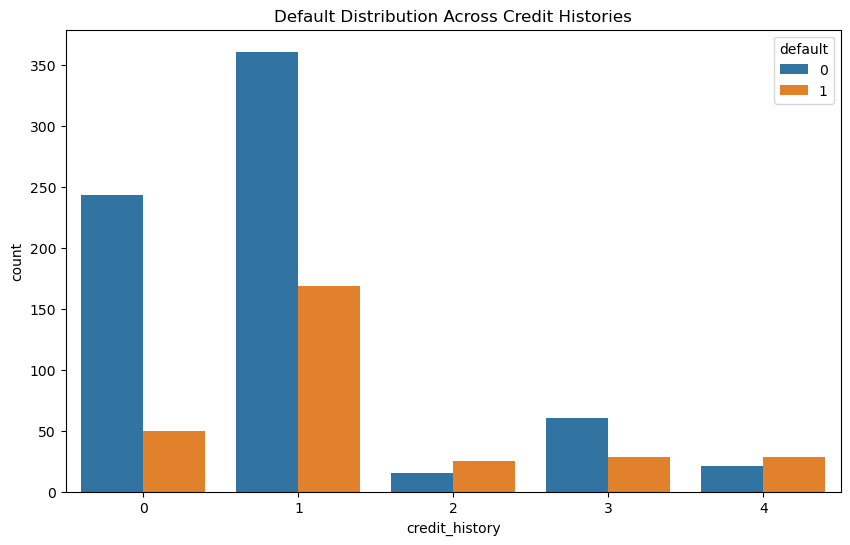

In [11]:
# Visualize the distribution of default across different credit histories
plt.figure(figsize=(10, 6))
sns.countplot(x='credit_history', hue='default', data=df)
plt.title('Default Distribution Across Credit Histories')
plt.show()


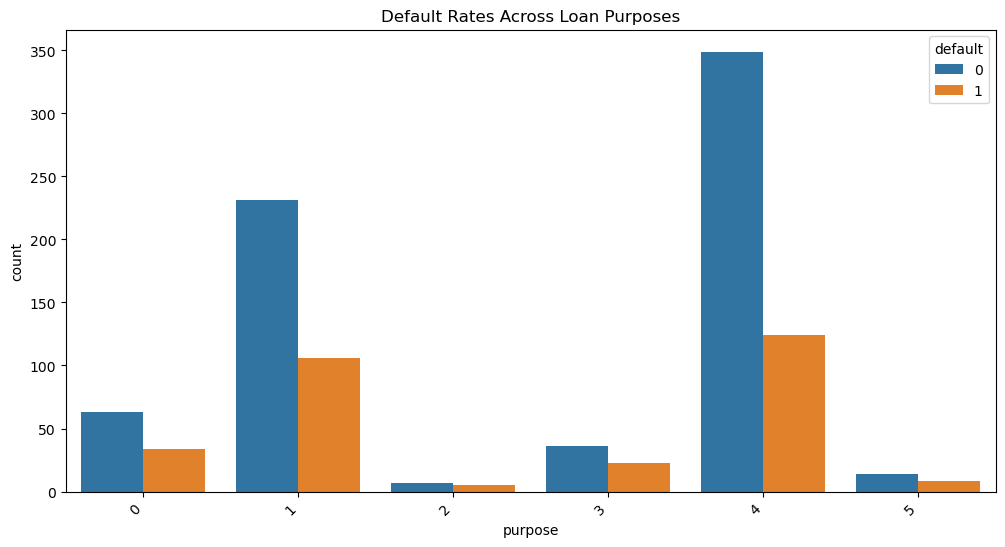

In [12]:
# Explore default rates for different loan purposes
plt.figure(figsize=(12, 6))
sns.countplot(x='purpose', hue='default', data=df)
plt.title('Default Rates Across Loan Purposes')
plt.xticks(rotation=45, ha='right')
plt.show()


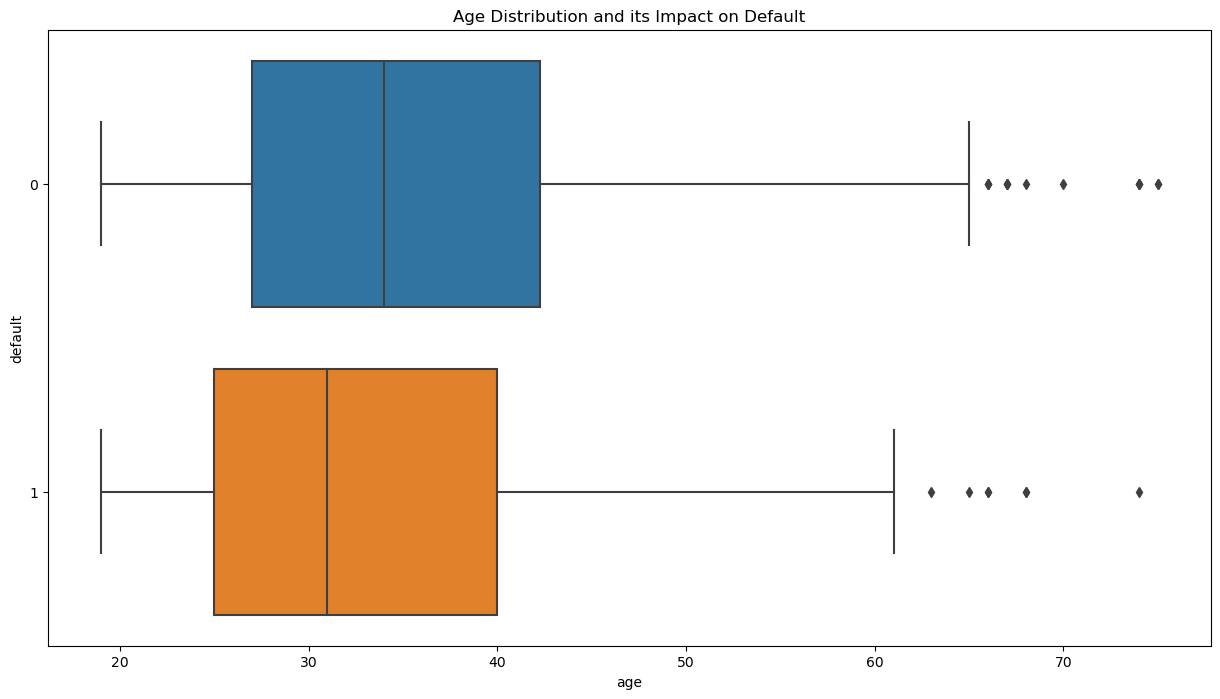

In [13]:
# Visualize the distribution of default for demographic factors
plt.figure(figsize=(15, 8))
sns.boxplot(x='age', y='default', data=df, orient='h')
plt.title('Age Distribution and its Impact on Default')
plt.show()
